### 4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном 

не стационарный, с сезоном, с циклом, с трендом внутри сезона

б) Количество денег, которые тратят покупатели в интернет магазине.

не стационарный, с циклом, с сезоном (в праздники тратят больше)

в) Вес растущего котенка.

не стационарный, с трендом (он растет)

г) Прирост объема деревьев в лесу от времени

стационарный

### Вариант 2)
#### 1. Прочитайте базу "COVID_19_data" и сделайте модель для сглаженой формы(экспоненциально) по приросту(первые разности) или по прямому ряду для выздоровлений(или заболеваний) с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
Оцените ошибку модели из п.1 .
Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats as scs

In [2]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
19923,19924,04/29/2020,Wyoming,US,2020-04-30 02:32:27,545.0,7.0,0.0
19924,19925,04/29/2020,Xinjiang,Mainland China,2020-04-30 02:32:27,76.0,3.0,73.0
19925,19926,04/29/2020,Yukon,Canada,2020-04-30 02:32:27,11.0,0.0,0.0
19926,19927,04/29/2020,Yunnan,Mainland China,2020-04-30 02:32:27,185.0,2.0,181.0
19927,19928,04/29/2020,Zhejiang,Mainland China,2020-04-30 02:32:27,1268.0,1.0,1263.0


In [4]:
COVID_.describe()

,SNo,Confirmed,Deaths,Recovered
count,19928.000000,19928.000000,19928.000000,19928.000000
mean,9964.500000,3550.325472,219.624147,927.807607
std,5752.862418,17033.481526,1572.904962,6605.789443
min,1.000000,0.000000,0.000000,0.000000
25%,4982.750000,11.000000,0.000000,0.000000
50%,9964.500000,118.000000,1.000000,2.000000
75%,14946.250000,787.000000,10.000000,86.250000
max,19928.000000,299691.000000,27682.000000,132929.000000


In [5]:
COVID_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 8 columns):
SNo                19928 non-null int64
ObservationDate    19928 non-null object
Province/State     9746 non-null object
Country/Region     19928 non-null object
Last Update        19928 non-null object
Confirmed          19928 non-null float64
Deaths             19928 non-null float64
Recovered          19928 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']) #.dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']) #.dt.date

In [7]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [8]:
COVID.tail(20)

Confirmed   Deaths  Recovered
Data       Country/Region                                     
2020-04-29 Thailand                 2947.0     54.0     2665.0
           Timor-Leste                24.0      0.0        6.0
           Togo                      109.0      7.0       64.0
           Trinidad and Tobago       116.0      8.0       71.0
           Tunisia                   980.0     40.0      294.0
           Turkey                 117589.0   3081.0    44040.0
           UK                     166441.0  26166.0      857.0
           US                    1039909.0  60967.0   120720.0
           Uganda                     81.0      0.0       52.0
           Ukraine                  9866.0    250.0     1103.0
           United Arab Emirates    11929.0     98.0     2329.0
           Uruguay                   630.0     15.0      412.0
           Uzbekistan               2002.0      9.0     1096.0
           Venezuela                 331.0     10.0      142.0
           Vietnam                   270.0      0.0      222.0
           West Bank and Gaza        344.0      2.0       71.0
           Western Sahara              6.0      0.0        5.0
           Yemen                       6.0      0.0        1.0
           Zambia                     97.0      3.0       54.0
           Zimbabwe                   32.0      4.0        5.0

In [9]:
COVID_['Country/Region'].unique().shape

(220,)

In [10]:
for i in COVID_['Country/Region'].unique():
    _ = COVID.loc[COVID.index.get_level_values('Country/Region')==i].shape
    if (_[0] > 50) & (COVID.loc[(COVID.index.get_level_values( 'Country/Region')==i),'Confirmed'].max() > 50000):
        print(i, _)

Mainland China (99, 3)
US (99, 3)
Brazil (65, 3)
France (97, 3)
Canada (95, 3)
Germany (93, 3)
Italy (90, 3)
UK (90, 3)
Russia (90, 3)
Spain (89, 3)
Iran (71, 3)


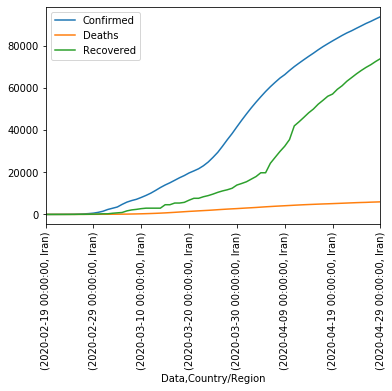

In [11]:
# судя по всему, US и Brazil и Canada и UK и Russia =( далеко от плато.
# Iran, Germany,Italy,Spain  начали выходить на плато. France - не понятно.  возьмем для оптимизма Iran
COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

странные скачки в Recovered, посмотрим на них поближе

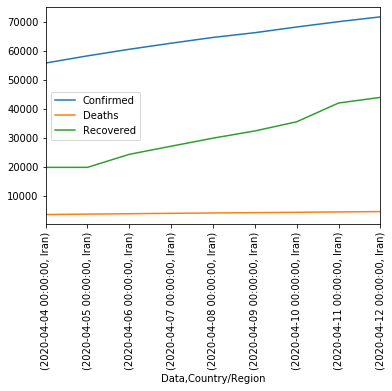

In [12]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')=='Iran') & (COVID.index.get_level_values('Data') > pd.to_datetime('2020-04-03'))& (COVID.index.get_level_values('Data') < pd.to_datetime('2020-04-13'))), ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

In [13]:
COVID.loc[((COVID.index.get_level_values('Country/Region')=='Iran') & (COVID.index.get_level_values('Data') > pd.to_datetime('2020-04-03'))& (COVID.index.get_level_values('Data') < pd.to_datetime('2020-04-13'))), ['Confirmed','Deaths','Recovered']]

,,Confirmed,Deaths,Recovered
Data,Country/Region,,,
2020-04-04,Iran,55743.0,3452.0,19736.0
2020-04-05,Iran,58226.0,3603.0,19736.0
2020-04-06,Iran,60500.0,3739.0,24236.0
2020-04-07,Iran,62589.0,3872.0,27039.0
2020-04-08,Iran,64586.0,3993.0,29812.0
2020-04-09,Iran,66220.0,4110.0,32309.0
2020-04-10,Iran,68192.0,4232.0,35465.0
2020-04-11,Iran,70029.0,4357.0,41947.0
2020-04-12,Iran,71686.0,4474.0,43894.0


скачки в количестве выздоровших с 4 и 5 апреля одинаковые цифры, затем 6го скачок <br>
10-11 апреля просто скачок в 2 раза<br>
скачок китая с из-за подсчета Ирана не касается<br>


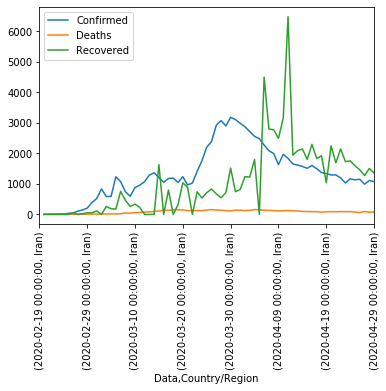

In [14]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Confirmed - действительно выходит на плато <br>
Deaths - плюс минус ровно <br>
Recovered - действительно пики

In [15]:
# первая разность
X1 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0
X1.shape

(71, 3)

In [16]:
# сам ряд
X2 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].values 
X2.shape

(71, 3)

In [17]:
# датные столбцы, день недели и день года
X3 = COVID.iloc[COVID.index.get_level_values('Country/Region')=='Iran'].index.get_level_values( 'Data')
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear
X3.shape, X3_1.shape, X3_2.shape 

((71,), (71,), (71,))

In [18]:
XX = np.concatenate([X1,X2], axis= 1)
XX = np.concatenate([XX,np.array(X3_1).reshape((X1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(X3_2).reshape((X1.shape[0],1))], axis= 1)
XX.shape

(71, 8)

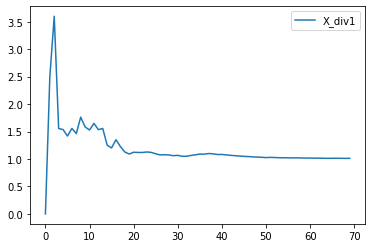

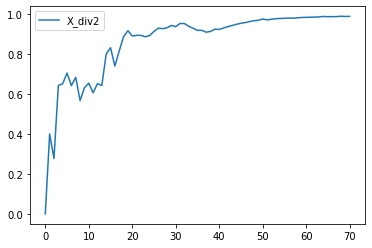

In [19]:
# есть первая разность. есть ли смысл строить не разность а первое частное?
# ответ - нету смысла, оно неинтересное, слишком гладкое.
X_div1 = [0]

for i in range(1,len(XX[:,3])-1):
    X_div1 = np.append(X_div1, XX[:,3][i]/XX[:,3][i-1])

plt.plot(X_div1, label='X_div1')
plt.legend()
plt.show()

# а если наоборот?..
X_div2 = [0]

for i in range(1,len(XX[:,3])):
    X_div2 = np.append(X_div2, XX[:,3][i-1]/XX[:,3][i])

plt.plot(X_div2, label='X_div2')
plt.legend()
plt.show()

# XX = np.concatenate([XX,X_diff_d1.reshape((X_diff_d1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_div2.reshape((X_div2.shape[0],1))], axis= 1)

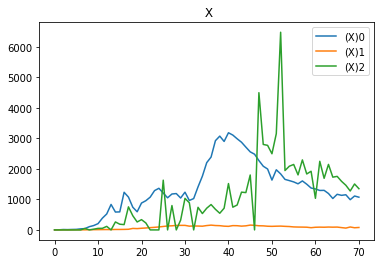

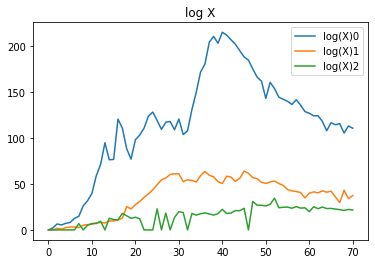

In [20]:
# логарифмы первых разностей
X_log0, lmbda0 = scs.boxcox(XX[:,0]+1)
X_log1, lmbda1 = scs.boxcox(XX[:,1]+1)
X_log2, lmbda2 = scs.boxcox(XX[:,2]+1) 

plt.plot(XX[:,0], label='(X)0')
plt.plot(XX[:,1], label='(X)1')
plt.plot(XX[:,2], label='(X)2')
plt.legend()
plt.title(' X')
plt.show()

plt.plot(X_log0[:], label='log(X)0')
plt.plot(X_log1[:], label='log(X)1')
plt.plot(X_log2[:], label='log(X)2')
plt.legend()
plt.title('log X')
plt.show()

XX = np.concatenate([XX,X_log0.reshape((X_log0.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_log1.reshape((X_log1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_log2.reshape((X_log2.shape[0],1))], axis= 1)

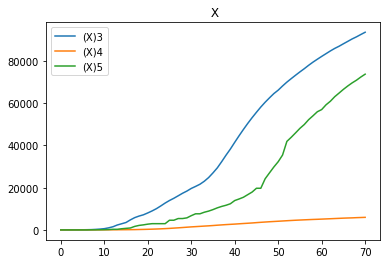

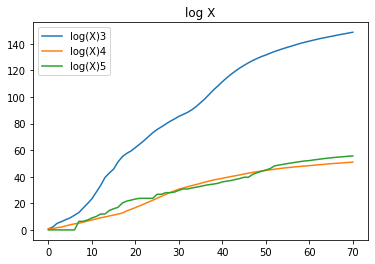

In [21]:
#логарифмы исходных данных
X_log3, lmbda3 = scs.boxcox(XX[:,3])
X_log4, lmbda4 = scs.boxcox(XX[:,4])
X_log5, lmbda5 = scs.boxcox(XX[:,5]+1) #тут есть нули

plt.plot(XX[:,3], label='(X)3')
plt.plot(XX[:,4], label='(X)4')
plt.plot(XX[:,5], label='(X)5')
plt.legend()
plt.title(' X')
plt.show()

plt.plot(X_log3[:], label='log(X)3')
plt.plot(X_log4[:], label='log(X)4')
plt.plot(X_log5[:], label='log(X)5')
plt.legend()
plt.title('log X')
plt.show()

XX = np.concatenate([XX,X_log3.reshape((X_log3.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_log4.reshape((X_log4.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_log5.reshape((X_log5.shape[0],1))], axis= 1)

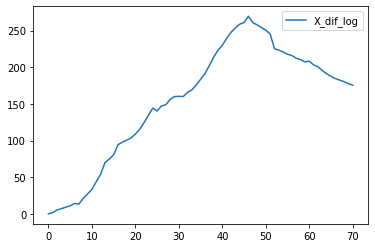

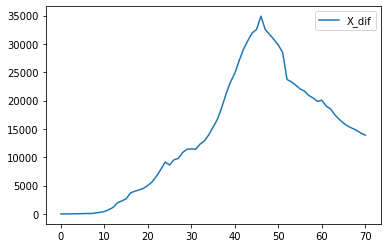

In [22]:
# разница между confirmed recovered death
X_dif=XX[:,3]-XX[:,4]-XX[:,5]
X_dif_log, lmbda_dif = scs.boxcox(X_dif+1)
plt.plot(X_dif_log, label='X_dif_log')
plt.legend()
plt.show()

plt.plot(X_dif, label='X_dif')
plt.legend()
plt.show()

XX = np.concatenate([XX,X_dif.reshape((X_dif.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_dif_log.reshape((X_dif_log.shape[0],1))], axis= 1)

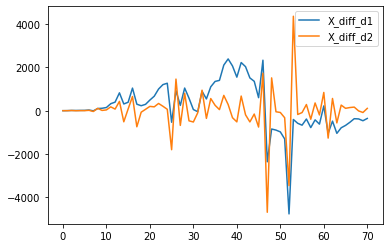

In [23]:
# первая и вторая разности для разницы между confirmed recovered death
X_diff_d1 = np.append(0, np.diff(X_dif,n=1))
X_diff_d2 = np.append([0,0], np.diff(X_dif,n=2))
plt.plot(X_diff_d1, label='X_diff_d1')
plt.plot(X_diff_d2, label='X_diff_d2')
plt.legend()
plt.show()

XX = np.concatenate([XX,X_diff_d1.reshape((X_diff_d1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_diff_d2.reshape((X_diff_d2.shape[0],1))], axis= 1)

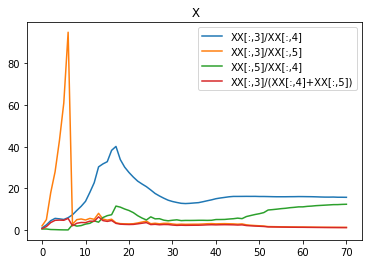

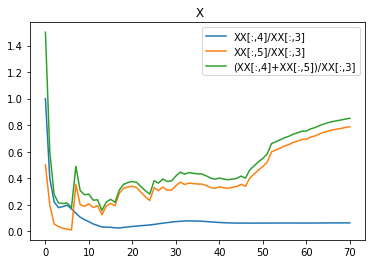

In [24]:
XX5_t = XX[:,5]
XX5_t[XX5_t==0] = 1
XX5_t

#отношение и их логарифмы
X_rel0 = XX[:,3]/XX[:,4]
X_rel01 = XX[:,4]/XX[:,3]
X_rel1 = XX[:,3]/XX5_t
X_rel11 = XX[:,5]/XX[:,3]
X_rel2 = XX[:,5]/XX[:,4]
X_rel21 = XX[:,4]/XX[:,5]
X_rel3 = XX[:,3]/(XX[:,4]+XX[:,5])
X_rel31 = (XX[:,4]+XX[:,5])/XX[:,3]

X_rel0_log, lmbda0 = scs.boxcox(X_rel0)
X_rel01_log, lmbda01 = scs.boxcox(X_rel01)
X_rel1_log, lmbda1 = scs.boxcox(X_rel1)
X_rel11_log, lmbda11 = scs.boxcox(X_rel11)
X_rel2_log, lmbda2 = scs.boxcox(X_rel2)
X_rel21_log, lmbda21 = scs.boxcox(X_rel21)
X_rel3_log, lmbda3 = scs.boxcox(X_rel3)
X_rel31_log, lmbda31 = scs.boxcox(X_rel31)

plt.plot(X_rel0, label='XX[:,3]/XX[:,4]')
plt.plot(X_rel1, label='XX[:,3]/XX[:,5]')
plt.plot(X_rel2, label='XX[:,5]/XX[:,4]')
plt.plot(X_rel3, label='XX[:,3]/(XX[:,4]+XX[:,5])')
plt.legend()
plt.title(' X')
plt.show()

plt.plot(X_rel01, label='XX[:,4]/XX[:,3]')
plt.plot(X_rel11, label='XX[:,5]/XX[:,3]')
# plt.plot(X_rel21, label='XX[:,4]/XX[:,5]')
plt.plot(X_rel31, label='(XX[:,4]+XX[:,5])/XX[:,3]')
plt.legend()
plt.title(' X')
plt.show()


XX = np.concatenate([XX,X_rel0.reshape((X_rel0.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel01.reshape((X_rel01.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel1.reshape((X_rel1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel11.reshape((X_rel11.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel2.reshape((X_rel2.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel21.reshape((X_rel21.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel3.reshape((X_rel3.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel31.reshape((X_rel31.shape[0],1))], axis= 1)

XX = np.concatenate([XX,X_rel0_log.reshape((X_rel0_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel01_log.reshape((X_rel01_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel1_log.reshape((X_rel1_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel11_log.reshape((X_rel11_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel2_log.reshape((X_rel2_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel21_log.reshape((X_rel21_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel3_log.reshape((X_rel3_log.shape[0],1))], axis= 1)
XX = np.concatenate([XX,X_rel31_log.reshape((X_rel31_log.shape[0],1))], axis= 1)

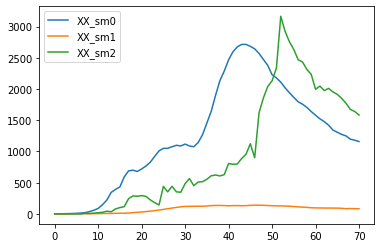

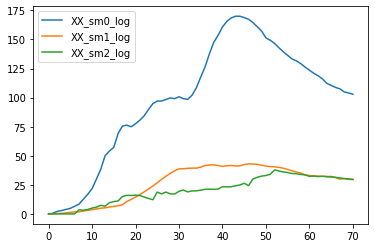

In [25]:
# сглаживание и их логарифмы
# сглаживание относительно самих данных бесполезно. но можно посмотреть сглаживание у первых разностей
# теоретически сглаживание можно строить вообще к половине столбцов, но у меня и так матрица едва ли не квадратная, не буду

def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

XX_sm0 = exponential_smoothing(XX[:,0], 0.2)
XX_sm1 = exponential_smoothing(XX[:,1], 0.2)
XX_sm2 = exponential_smoothing(XX[:,2], 0.2)

XX_sm0_log, lmbda0 = scs.boxcox(np.array(XX_sm0)+1)
XX_sm1_log, lmbda1 = scs.boxcox(np.array(XX_sm1)+1)
XX_sm2_log, lmbda2 = scs.boxcox(np.array(XX_sm2)+1)


XX = np.concatenate([XX,np.array(XX_sm0).reshape(XX.shape[0],1)], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm1).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm2).reshape((XX.shape[0],1))], axis= 1)

XX = np.concatenate([XX,np.array(XX_sm0_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm1_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm2_log).reshape((XX.shape[0],1))], axis= 1)

plt.plot(XX_sm0, label='XX_sm0')
plt.plot(XX_sm1, label='XX_sm1')
plt.plot(XX_sm2, label='XX_sm2')
plt.legend()
plt.show()

plt.plot(XX_sm0_log, label='XX_sm0_log')
plt.plot(XX_sm1_log, label='XX_sm1_log')
plt.plot(XX_sm2_log, label='XX_sm2_log')
plt.legend()
plt.show()

In [26]:
XX.shape

(71, 41)

In [27]:
# 0,1,2 первая разность
# 3,4,5 сами значения
# 6 день недели, 7 день года
COVID_Data = pd.DataFrame(data= XX, index= X3)
COVID_Data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Data,,,,,,,,,,,,,,,,,,,,,
2020-02-19,0.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.000000,0.000000,...,-0.536791,0.536791,-0.401072,0.401072,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2020-02-20,3.0,0.0,0.0,5.0,2.0,1.0,3.0,1.0,0.400000,2.169940,...,-0.536791,0.536791,0.517914,-0.517914,0.600000,0.000000,0.000,0.540626,0.000000,0.000000
2020-02-21,13.0,2.0,0.0,18.0,4.0,1.0,4.0,2.0,0.277778,6.500543,...,-0.851152,0.851152,1.326133,-1.326133,3.080000,0.400000,0.000,2.177259,0.378933,0.000000
2020-02-22,10.0,1.0,0.0,28.0,5.0,1.0,5.0,3.0,0.642857,5.394366,...,-0.921454,0.921454,1.606123,-1.606123,4.464000,0.520000,0.000,2.899403,0.485781,0.000000
2020-02-23,15.0,3.0,0.0,43.0,8.0,1.0,6.0,4.0,0.651163,7.186052,...,-1.035251,1.035251,1.631705,-1.631705,6.571200,1.016000,0.000,3.865185,0.902716,0.000000
2020-02-24,18.0,4.0,0.0,61.0,12.0,1.0,0.0,5.0,0.704918,8.153752,...,-1.105176,1.105176,1.612078,-1.612078,8.856960,1.612800,0.000,4.792320,1.364475,0.000000
2020-02-25,34.0,4.0,0.0,95.0,16.0,1.0,1.0,6.0,0.642105,12.534805,...,-1.143065,1.143065,1.802878,-1.802878,13.885568,2.090240,0.000,6.558604,1.710728,0.000000
2020-02-26,44.0,3.0,49.0,139.0,19.0,49.0,2.0,7.0,0.683453,14.862598,...,1.396254,-1.396254,0.728904,-0.728904,19.908454,2.272192,9.800,8.369438,1.838272,3.561953
2020-02-27,106.0,7.0,0.0,245.0,26.0,49.0,3.0,8.0,0.567347,26.226722,...,0.817428,-0.817428,1.222305,-1.222305,37.126764,3.217754,7.840,12.594748,2.469346,3.147541


In [28]:
COVID_Data['date'] = COVID_Data.index
COVID_Data['weekofyear'] = COVID_Data['date'].dt.weekofyear

хотела построить праздники, но календарь считает что их нет, они всегда 0, убираю

In [29]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
# from datetime import timedelta
# one_day = timedelta(days=1)
# cal = calendar()

# COVID_Data['is_holiday'] = COVID_Data.index.get_level_values('Data').isin([d.date() for d in cal.holidays()]).astype('uint8')
# COVID_Data['is_holiday'].value_counts()

In [30]:
# недельное сглаживание первых разностей по среднему
week_m = COVID_Data.loc[:,0].resample("W").mean()
# недельное сглаживание первых разностей распределение
week_s = COVID_Data.loc[:,0].resample("W").mean()
for i in range(len(week_m.values)):
    COVID_Data.loc[COVID_Data['weekofyear'] == i+8,'week_m'] = week_m.values[i]
    COVID_Data.loc[COVID_Data['weekofyear'] == i+8,'week_s'] = week_s.values[i]

In [31]:
COVID_Data.drop('weekofyear',axis=1,inplace=True)
COVID_Data.drop('date',axis=1,inplace=True)

In [42]:
COVID_Data.columns = ['fst_dif_c', 
                      'fst_dif_d',
                      'fst_dif_r',
                      'conf',
                      'death',
                      'rec',
                      'dayofweek',
                      'dayofyear',
                      'fst_div_c',
                      'fst_dif_c_log', 
                      'fst_dif_d_log',
                      'fst_dif_r_log',
                      'conf_log',
                      'death_log',
                      'rec_log',
                      'c-r-d',
                      'c-r-d_log',
                      'c-r-d_d1',
                      'c-r-d_d2',
                      'X_rel0',
                      'X_rel01',
                      'X_rel1' ,
                      'X_rel11',
                      'X_rel2' ,
                      'X_rel21',
                      'X_rel3' ,
                      'X_rel31',
                      'X_rel0_log', 
                      'X_rel01_log',
                      'X_rel1_log', 
                      'X_rel11_log',
                      'X_rel2_log', 
                      'X_rel21_log',
                      'X_rel3_log', 
                      'X_rel31_log',
                      'XX_sm0',
                      'XX_sm1',
                      'XX_sm2',
                      'XX_sm0_log',
                      'XX_sm1_log',
                      'XX_sm2_log',
                      'week_m',
                      'week_s'
                       ]

In [43]:
COVID_Data.corr()

,fst_dif_c,fst_dif_d,fst_dif_r,conf,death,rec,dayofweek,dayofyear,fst_div_c,fst_dif_c_log,...,X_rel3_log,X_rel31_log,XX_sm0,XX_sm1,XX_sm2,XX_sm0_log,XX_sm1_log,XX_sm2_log,week_m,week_s
fst_dif_c,1.000000,0.813475,0.412006,0.456930,0.475907,0.213335,0.008965,0.544230,0.602148,0.974707,...,-0.223646,0.223646,0.925224,0.849200,0.382830,0.908503,0.838428,0.611126,0.958255,0.958255
fst_dif_d,0.813475,1.000000,0.434808,0.479836,0.505031,0.268373,-0.015210,0.601379,0.724680,0.852254,...,-0.359471,0.359471,0.834706,0.948228,0.431602,0.873133,0.953141,0.679941,0.829986,0.829986
fst_dif_r,0.412006,0.434808,1.000000,0.698867,0.689885,0.605952,-0.052586,0.668011,0.489732,0.458223,...,-0.544953,0.544953,0.618035,0.573714,0.829269,0.610911,0.572621,0.766010,0.410495,0.410495
conf,0.456930,0.479836,0.698867,1.000000,0.997482,0.957044,-0.031536,0.977154,0.646447,0.523671,...,-0.788047,0.788047,0.670527,0.658232,0.915946,0.697106,0.679776,0.916124,0.472696,0.472696
death,0.475907,0.505031,0.689885,0.997482,1.000000,0.950864,-0.032499,0.979776,0.648139,0.538060,...,-0.791513,0.791513,0.677850,0.685048,0.906711,0.703581,0.703622,0.913912,0.493546,0.493546
rec,0.213335,0.268373,0.605952,0.957044,0.950864,1.000000,-0.038464,0.917925,0.538733,0.298287,...,-0.796599,0.796599,0.432051,0.448575,0.866014,0.481689,0.481696,0.815032,0.228854,0.228854
dayofweek,0.008965,-0.015210,-0.052586,-0.031536,-0.032499,-0.038464,1.000000,-0.036274,-0.023248,0.002210,...,0.055826,-0.055826,-0.001039,-0.010437,-0.021229,-0.007725,-0.014974,-0.030853,-0.042765,-0.042765
dayofyear,0.544230,0.601379,0.668011,0.977154,0.979776,0.917925,-0.036274,1.000000,0.763822,0.633265,...,-0.755449,0.755449,0.718815,0.742749,0.874703,0.777509,0.773926,0.951398,0.562880,0.562880
fst_div_c,0.602148,0.724680,0.489732,0.646447,0.648139,0.538733,-0.023248,0.763822,1.000000,0.724583,...,-0.324056,0.324056,0.689625,0.737687,0.593201,0.797288,0.783432,0.808138,0.636381,0.636381
fst_dif_c_log,0.974707,0.852254,0.458223,0.523671,0.538060,0.298287,0.002210,0.633265,0.724583,1.000000,...,-0.272069,0.272069,0.925587,0.876348,0.457067,0.953041,0.883347,0.711182,0.947245,0.947245


42 признака. на 71 строку =) перебор. возьму те признаки, где корреляция меньше.

In [110]:
XXX = COVID_Data.loc[:,['fst_dif_d','fst_div_c','fst_dif_c_log','conf_log','death_log','rec_log','c-r-d_log']].to_numpy()
XXX.shape

(71, 7)

In [111]:
p = 3 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем
y = XXX[h+p:,0]
X =[]
for i in range(len(y)):
    xx = XXX[i:i+p,:]
    X.append(xx.reshape(XXX.shape[1]*p))
    
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,XXX.shape[1]*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))
X.shape, y.shape

((67, 21), (67, 1))

In [112]:
N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()
# и еще одну
model_gb = GradientBoostingRegressor(n_estimators=100)

In [113]:
model_lb.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

C:\Users\marchenko-i-u\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

y_predg = model_gb.predict(x_test)
y_predg_t = model_gb.predict(x_train)

In [115]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

error_ =np.mean(np.abs(y_predg-y_test))
print(error_)

error_p=np.mean(np.abs(y_test.reshape((10))-y_predg.reshape((10)))/y_test.reshape((10)))*100

print('error in MAPE :', error_p, '%')

18.63293697280376
11.925374513036582
error in MAPE : 13.71722422926814 %


я взяла не все признаки. когда использую все признаки, ошибка у линейной регрессии чудовищная - больше 1000. у бустинга маленькая, но я думаю это он переучивается. соответственно нужно покопаться в признаках и поискать те, которые помогут дать предсказание получше.

In [90]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

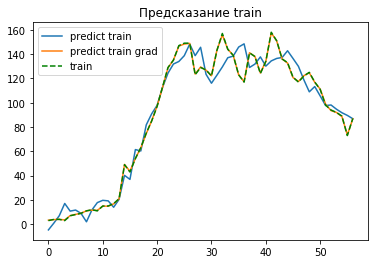

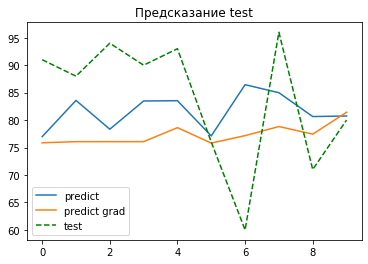

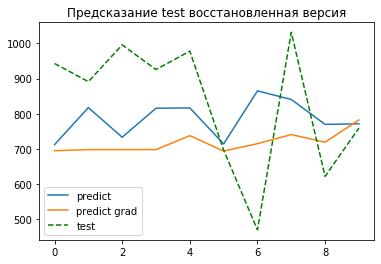

In [91]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_predg_t, label='predict train grad')
plt.plot(y_train,'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()
plt.plot(y_pred, label='predict')
plt.plot(y_predg, label='predict grad')
plt.plot(y_test, '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

plt.plot(invboxcox(y_pred,lmbda0), label='predict')
plt.plot(invboxcox(y_predg,lmbda0), label='predict grad')
plt.plot(invboxcox(y_test,lmbda0), '--g',label='test')
plt.legend()
plt.title('Предсказание test восстановленная версия')
plt.show()

In [116]:
p = 3 # 10 дней назад по истории
h=10    # 1 день вперед предсказываем
y = XXX[h+p:,0]
X =[]
for i in range(len(y)):
    xx = XXX[i:i+p,:]
    X.append(xx.reshape(XXX.shape[1]*p))
    
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,XXX.shape[1]*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))
X.shape, y.shape

((58, 21), (58, 1))

In [117]:
N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()
# и еще одну
model_gb = GradientBoostingRegressor(n_estimators=100)

In [118]:
model_lb.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

C:\Users\marchenko-i-u\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

y_predg = model_gb.predict(x_test)
y_predg_t = model_gb.predict(x_train)

In [120]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

error_ =np.mean(np.abs(y_predg-y_test))
print(error_)

error_p=np.mean(np.abs(y_test.reshape((10))-y_predg.reshape((10)))/y_test.reshape((10)))*100

print('error in MAPE :', error_p, '%')

75.47644712998279
20.9859670121772
error in MAPE : 27.72202926071911 %


Вывод: для глубины 10 предсказание конечно хуже

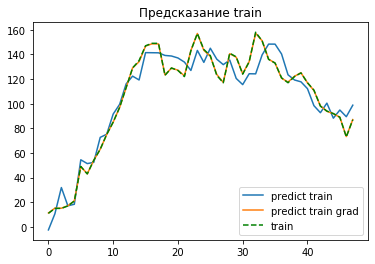

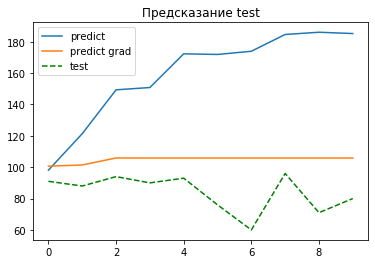

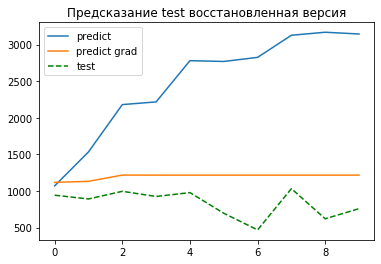

In [121]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_predg_t, label='predict train grad')
plt.plot(y_train,'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()
plt.plot(y_pred, label='predict')
plt.plot(y_predg, label='predict grad')
plt.plot(y_test, '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

plt.plot(invboxcox(y_pred,lmbda0), label='predict')
plt.plot(invboxcox(y_predg,lmbda0), label='predict grad')
plt.plot(invboxcox(y_test,lmbda0), '--g',label='test')
plt.legend()
plt.title('Предсказание test восстановленная версия')
plt.show()